# RiskFolio-Lib

- https://github.com/dcajasn/Riskfolio-Lib
- https://riskfolio-lib.readthedocs.io/en/latest/examples.html (start with first example)
- https://nbviewer.org/github/dcajasn/Riskfolio-Lib/blob/master/examples/Tutorial%201%20-%20Classic%20Mean%20Risk%20Optimization.ipynb

In [1]:
#%pip install --upgrade numpy
#%pip install --upgrade pandas
#%pip install --upgrade yfinance
#%pip install --upgrade riskfolio-lib

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [3]:
#tickers = ["AGG", "BIL", "EEM", "GLD", "SPY"]
tickers = ["AAPL", "GOOG", "MSFT", "NVDA"]
tickers.sort()

In [4]:
df = yf.download(tickers, period='10y')
df = df.loc[:,('Adj Close', slice(None))]
df.columns = tickers
# Calculating returns
Y = df[tickers].pct_change().dropna()
display(Y.head())

[*********************100%***********************]  4 of 4 completed


,AAPL,GOOG,MSFT,NVDA
Date,,,,
2013-03-28,-2.0837%,-1.0552%,0.8459%,1.4229%
2013-04-01,-3.1062%,0.8814%,0.0000%,-3.2736%
2013-04-02,0.2051%,1.4790%,0.6641%,-1.0475%
2013-04-03,0.5119%,-0.8413%,-0.8333%,-1.2215%
2013-04-04,-0.9885%,-1.3806%,0.1401%,0.9893%


In [5]:
p = rp.Portfolio(returns=Y)
method_mu='hist'
method_cov='hist'
#method_mu='ewma1'
#method_cov='ewma1'
#d=0.94
p.assets_stats(method_mu=method_mu, method_cov=method_cov)

In [6]:
model='Classic' # also BL, FM or BLFM
rm='MV' # risk measure CVar
obj='Sharpe' #MinRisk, MaxRet, Utility
hist=True
rf=0
l=0 #when obj=='Utility'

w = p.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T)


,AAPL,GOOG,MSFT,NVDA
weights,25.9295%,0.0000%,28.6700%,45.4005%


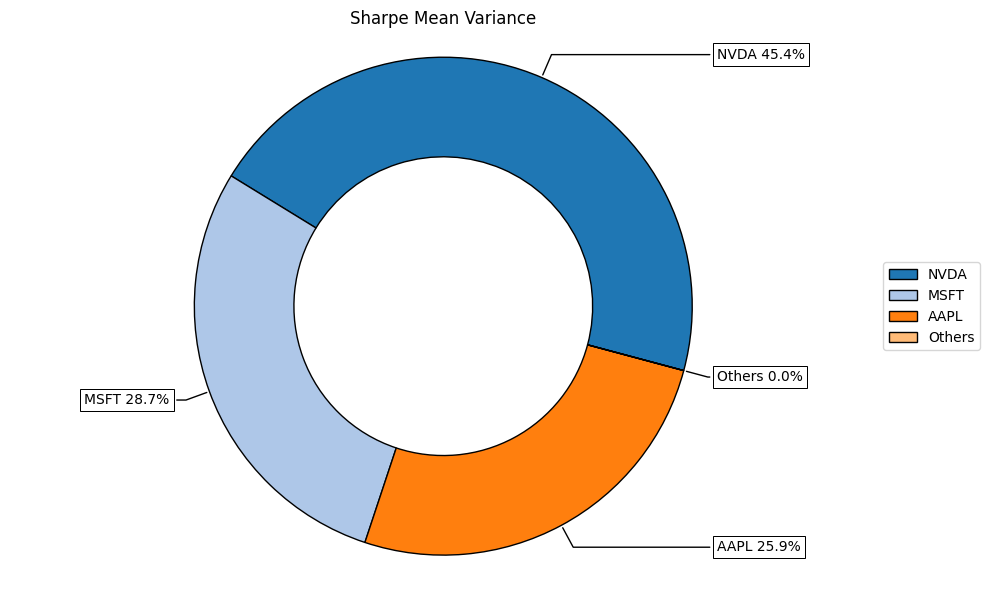

In [7]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [8]:
points = 50 # Number of points of the frontier
frontier = p.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
display(frontier.T.head())

,AAPL,GOOG,MSFT,NVDA
0,31.9073%,35.6092%,32.4835%,0.0000%
1,34.4102%,21.8422%,38.6646%,5.0830%
2,34.2899%,17.1292%,39.2560%,9.3248%
3,34.1887%,13.2516%,39.7393%,12.8203%
4,34.1006%,9.8553%,40.1629%,15.8811%


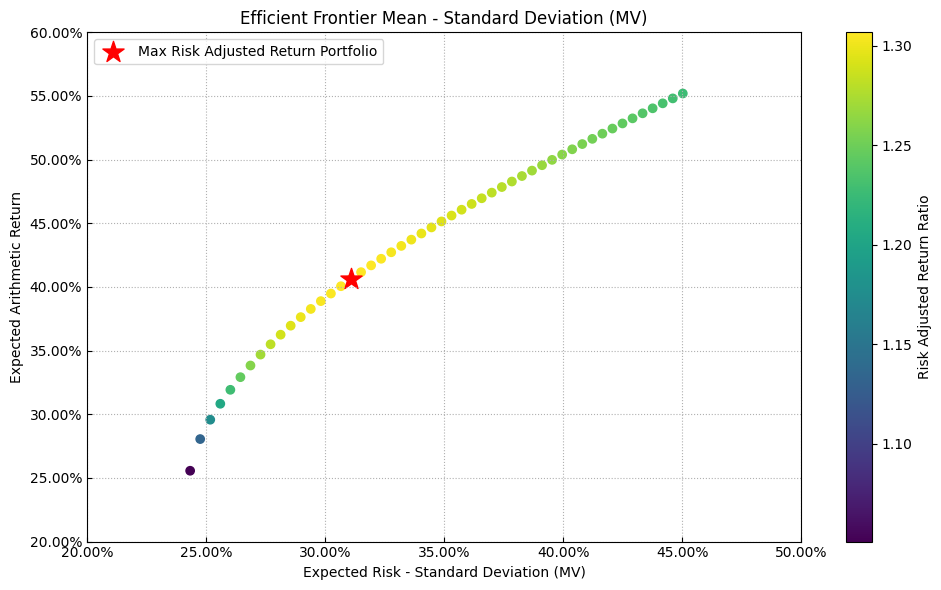

In [9]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = p.mu # Expected returns
cov = p.cov # Covariance matrix
returns = p.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

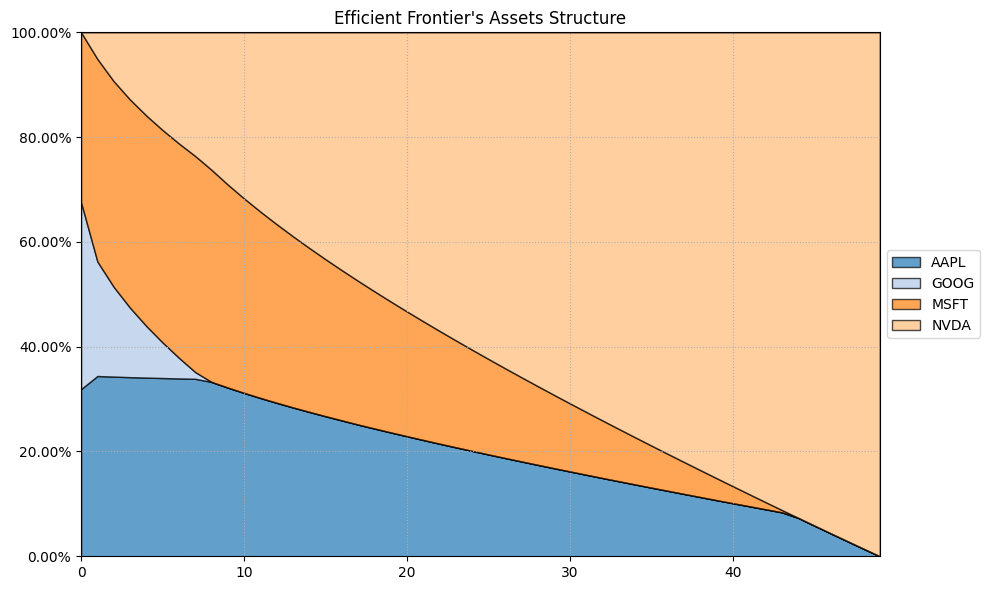

In [10]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [11]:
returns

,AAPL,GOOG,MSFT,NVDA
Date,,,,
2013-03-28,-2.0837%,-1.0552%,0.8459%,1.4229%
2013-04-01,-3.1062%,0.8814%,0.0000%,-3.2736%
2013-04-02,0.2051%,1.4790%,0.6641%,-1.0475%
2013-04-03,0.5119%,-0.8413%,-0.8333%,-1.2215%
2013-04-04,-0.9885%,-1.3806%,0.1401%,0.9893%
...,...,...,...,...
2023-03-21,1.1944%,3.8360%,0.5694%,1.1544%
2023-03-22,-0.9103%,-1.5306%,-0.5442%,1.0268%
2023-03-23,0.6969%,1.9574%,1.9722%,2.7316%


In [12]:
w

,weights
AAPL,25.9295%
GOOG,0.0000%
MSFT,28.6700%
NVDA,45.4005%


In [13]:
#ax = rp.jupyter_report(
#    returns,
#    w,
#    rm='MV',
#    rf=0,
#    alpha=0.05,
#    height=6,
#    width=14,
#    others=0.05,
#    nrow=5
#)